<a href="https://colab.research.google.com/github/yohanesnuwara/66DaysOfData/blob/main/D02_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Value Decomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD

<img src='https://user-images.githubusercontent.com/51282928/124387254-f9c6d880-dd07-11eb-9a77-205eb7600537.png' width='300'>

In [2]:
A = np.array([[3, 7], [5, 2]])
U, D, V = np.linalg.svd(A)
print(U)
print(D)
print(V)

[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]
[8.71337969 3.32821489]
[[-0.59455781 -0.80405286]
 [ 0.80405286 -0.59455781]]


## Data compression

In [3]:
# Load digit and flatten image to 1D array
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y) # Labels

(1797, 64)
[0 1 2 ... 8 9 8]


64 is 8x8 pixel

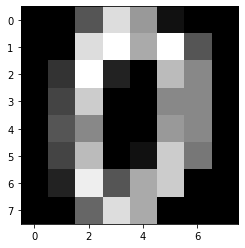

In [4]:
image = X[0]
image = image.reshape((8, 8))
plt.imshow(image, cmap='gray')
plt.show()

Reconstructing the digit with 1, 2, 3, and 4 components. Compare the results. 1 is still blurry, 2 already OK.

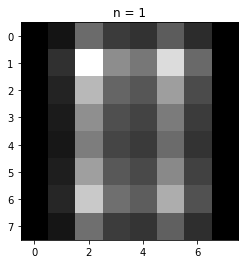

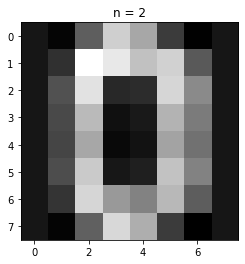

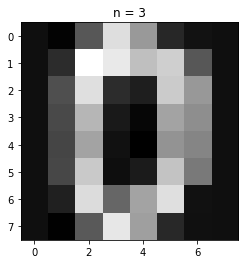

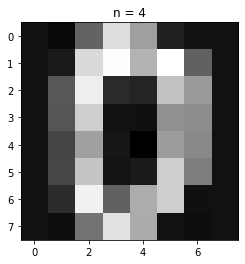

In [5]:
U, D, V = np.linalg.svd(image)

for i in [1, 2, 3, 4]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

Goose image.

--2021-07-05 07:46:29--  https://github.com/hadrienj/deepLearningBook-Notes/raw/master/2.8%20Singular%20Value%20Decomposition/test_svd.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hadrienj/deepLearningBook-Notes/master/2.8%20Singular%20Value%20Decomposition/test_svd.jpg [following]
--2021-07-05 07:46:30--  https://raw.githubusercontent.com/hadrienj/deepLearningBook-Notes/master/2.8%20Singular%20Value%20Decomposition/test_svd.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63765 (62K) [image/jpeg]
Saving to: ‘test_svd.jpg’

test_svd.jpg        100%[===================>]  62.27K  --.-KB

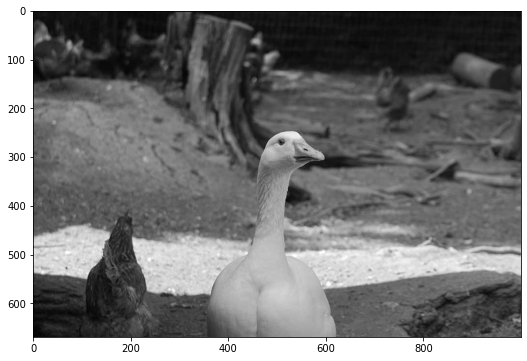

In [6]:
# Download image
!wget 'https://github.com/hadrienj/deepLearningBook-Notes/raw/master/2.8%20Singular%20Value%20Decomposition/test_svd.jpg'

img = Image.open('/content/test_svd.jpg')

# convert image to grayscale
imggray = img.convert('LA')

# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)

# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

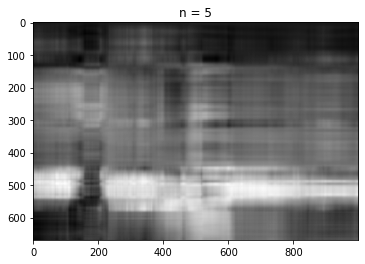

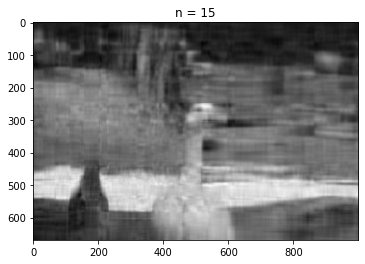

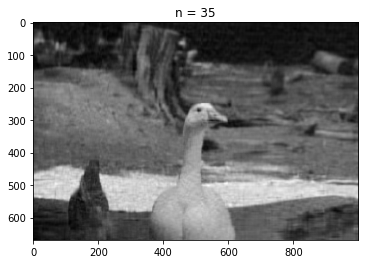

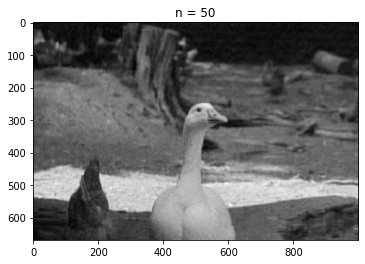

In [7]:
U, D, V = np.linalg.svd(imgmat)

for i in [5, 15, 35, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

## Topic modeling

Here is given a Wiki article. SVD can be used to classify articles. The following is originally a DataCamp "Unsupervised Learning" course practice, but uses NMF (Non-Negative Matrix Factorization) as classifier. 

In [8]:
# Get Wikipedia article dataset
wiki_path = 'https://raw.githubusercontent.com/yohanesnuwara/datasets/master/wikipedia-vectors.csv'
df = pd.read_csv(wiki_path)

articles = df.iloc[:,1:].values
titles = df.iloc[:,0].values
words = words = df.columns[1:]

# Create an SVD instance: model
n_components = 6
model = TruncatedSVD(n_components)

# Fit the model to articles
model.fit(articles)

# Transform the articles: svd_features
svd_features = model.transform(articles)

# Create a pandas DataFrame: df
df = pd.DataFrame(svd_features, index=titles)

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)
print(components_df)

# Print top words of each SVD components
for i in range(n_components): 
  component = components_df.iloc[i]
  print('Top words of SVD component {}'.format(i+1))   
  print(component.nlargest())
  print('\n')

   HTTP 404  Alexa Internet  ...    Sepsis  Adam Levine
0  0.035247        0.057951  ...  0.194238     0.246807
1 -0.019157       -0.022686  ...  0.118553     0.165943
2  0.053908        0.060670  ...  0.022893    -0.034422
3  0.008190        0.020821  ... -0.122367    -0.099097
4  0.095738        0.112682  ...  0.090993    -0.031752
5  0.298333        0.385128  ... -0.045009    -0.010653

[6 rows x 60 columns]
Top words of SVD component 1
Adam Levine              0.246807
Black Sabbath            0.239892
Red Hot Chili Peppers    0.237170
The Wanted               0.233583
Arctic Monkeys           0.227979
Name: 0, dtype: float64


Top words of SVD component 2
Black Sabbath            0.223831
Arctic Monkeys           0.212615
Red Hot Chili Peppers    0.212021
Nate Ruess               0.177470
Stevie Nicks             0.172960
Name: 1, dtype: float64


Top words of SVD component 3
Global warming                                   0.318324
2010 United Nations Climate Change Conference   

It successfully classifies the Wiki articles. 

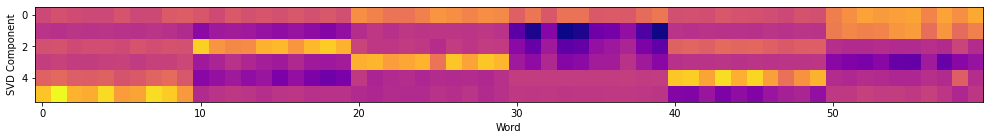

In [9]:
# Imshow plot
ko = components_df.values

plt.figure(figsize=(17,3))
plt.imshow(ko, cmap='plasma')
plt.xlabel("Word"); plt.ylabel("SVD Component")
plt.show()

## Recommender system

Using MovieLens 1M dataset

In [10]:
# Access dataset
!wget 'https://github.com/yohanesnuwara/datasets/raw/master/ml-1m.zip'
!unzip '/content/ml-1m.zip'

--2021-07-05 07:46:33--  https://github.com/yohanesnuwara/datasets/raw/master/ml-1m.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yohanesnuwara/datasets/master/ml-1m.zip [following]
--2021-07-05 07:46:33--  https://raw.githubusercontent.com/yohanesnuwara/datasets/master/ml-1m.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  30.7MB/s    in 0.2s    

2021-07-05 07:46:34 (30.7 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

Archive:  /content/ml-1m.zip
   creating: ml-1m/
  inflati

In [11]:
# Read the dataset
data = pd.io.parsers.read_csv('/content/ml-1m/ratings.dat', 
                              names=['user_id', 'movie_id', 'rating', 'time'],
                              engine='python', delimiter='::')

movie_data = pd.io.parsers.read_csv('/content/ml-1m/movies.dat',
                                    names=['movie_id', 'title', 'genre'],
                                    engine='python', delimiter='::')

print(data.head())
print(movie_data.head())

   user_id  movie_id  rating       time
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
   movie_id                               title                         genre
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


In [12]:
# Number of users
print(len(data.user_id.unique()))

# Number of movies
print(len(movie_data.movie_id.unique()))

6040
3883


In [13]:
# Create matrix, rows as movies, columns as users
ratings_mat = np.ndarray(shape=(np.max(data.movie_id.values), 
                                np.max(data.user_id.values)), dtype=np.uint8)
ratings_mat[data.movie_id.values-1, data.user_id.values-1] = data.rating.values

ratings_df = pd.DataFrame(ratings_mat)
ratings_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6000,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039
0,5,0,0,0,0,4,20,4,5,5,0,0,0,0,8,64,0,4,5,0,3,0,4,64,0,3,0,3,0,0,16,64,0,5,0,5,0,5,20,64,...,0,0,0,0,0,2,16,64,0,5,5,0,5,0,5,4,0,0,0,0,3,5,16,64,5,0,0,0,0,0,16,4,0,0,4,0,0,0,0,3
1,0,0,0,0,0,0,16,64,0,5,0,0,3,0,0,64,0,2,0,0,0,0,2,64,0,0,1,0,0,0,16,64,0,0,0,0,0,0,16,5,...,3,0,0,0,0,2,16,64,0,0,0,0,0,0,8,64,0,0,4,0,0,0,16,64,0,0,0,0,0,4,16,64,0,0,0,0,0,0,16,64
2,0,0,0,0,0,0,16,64,0,0,0,0,0,0,8,64,0,0,0,0,0,0,0,64,0,2,0,0,0,0,16,64,0,0,0,0,0,0,16,64,...,0,0,0,0,0,0,20,64,0,0,0,0,0,0,16,2,0,0,0,0,0,0,0,64,3,0,0,0,0,0,20,64,0,0,1,0,0,0,16,64
3,0,0,0,0,0,0,16,3,0,0,0,0,0,0,20,64,0,0,0,0,0,0,8,64,0,3,0,0,0,0,16,64,0,0,0,0,0,0,0,64,...,0,0,0,0,0,0,8,64,0,0,0,0,0,0,16,64,0,0,0,0,0,0,8,64,3,0,0,0,0,0,0,64,0,0,2,2,0,0,20,64
4,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0,64,0,5,0,0,0,0,8,64,0,0,0,0,0,0,8,64,...,0,0,0,0,0,0,20,64,0,0,0,0,0,0,20,64,0,0,0,0,0,0,16,64,0,0,0,0,0,0,20,64,0,0,1,0,0,0,20,64


In [14]:
# Normalize matrix
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

# Compute SVD
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)

In [15]:
def top_cosine_similarity(data, movie_id, top_n=10):
  index = movie_id - 1 # Movie id starts from 1 in the dataset
  movie_row = data[index, :]
  magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
  similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
  sort_indexes = np.argsort(-similarity)
  return sort_indexes[:top_n]

In [16]:
def print_similar_movies(movie_data, movie_id, top_indexes):
  print('Recommendations for {0}: \n'.format(
  movie_data[movie_data.movie_id == movie_id].title.values[0]))
  for id in top_indexes + 1:
      print(movie_data[movie_data.movie_id == id].title.values[0])

Recommends other movies, given one movie

In [17]:
# Pick number of principal components
k = 50
movie_id = 2 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)

print_similar_movies(movie_data, movie_id, indexes)

Recommendations for Jumanji (1995): 

Jumanji (1995)
Sword in the Stone, The (1963)
Madness of King George, The (1994)
Craft, The (1996)
Lightning Jack (1994)
Mute Witness (1994)
Cry, the Beloved Country (1995)
World of Apu, The (Apur Sansar) (1959)
Mary Reilly (1996)
Strawberry and Chocolate (Fresa y chocolate) (1993)


References:

* Hadrien Jean: https://colab.research.google.com/github/hadrienj/deepLearningBook-Notes/blob/master/2.8%20Singular%20Value%20Decomposition/2.8%20Singular%20Value%20Decomposition.ipynb#scrollTo=hd55_5TRqhYD
* https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0
* https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/
* Other resources:
  * https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d
  * https://towardsdatascience.com/recommender-system-singular-value-decomposition-svd-truncated-svd-97096338f361